## Sinnvolle Darstellung von Series

Gegeben sind drei `pandas.Series` mit unterschiedlichen Inhalten. Stellen Sie diese Daten jeweils in einfachen Plots *sinnvoll* dar:
* geben Sie dem Plot einen aussagekräftigen Titel
* beschriften Sie ggf. die Achsen
* skalieren Sie ggf. die Achsen, um alle Werte oder ihren funktionalen Zusammenhang darstellen zu können
* erzeugen Sie ggf. eine Legende

In [51]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Aktinide
`actinides` enthält die Halbwertszeiten einer bestimmten Gruppe von chemischen Elementen ("Aktinide"), die allesamt radioaktiv sind. Angegeben ist jeweils die Halbwertszeit des langlebigsten Isotops, in Jahren.

In [52]:
actinides = pd.read_csv('data/actinides.csv', index_col=0).squeeze()
actinides

Elementsymbol
Ac    2.180000e+01
Th    1.400000e+10
Pa    3.250000e+04
U     4.470000e+09
Np    2.140000e+06
Pu    8.080000e+07
Am    7.370000e+03
Cm    1.560000e+07
Bk    1.380000e+03
Cf    9.000000e+02
Es    1.290000e+00
Fm    2.751540e-01
Md    1.423682e-01
No    1.102745e-04
Lr    1.254848e-03
Name: Halbwertszeit in Jahren, dtype: float64

<Axes: title={'center': 'Halbwertszeit in Jahren'}, xlabel='Elementsymbol', ylabel='Jahre'>

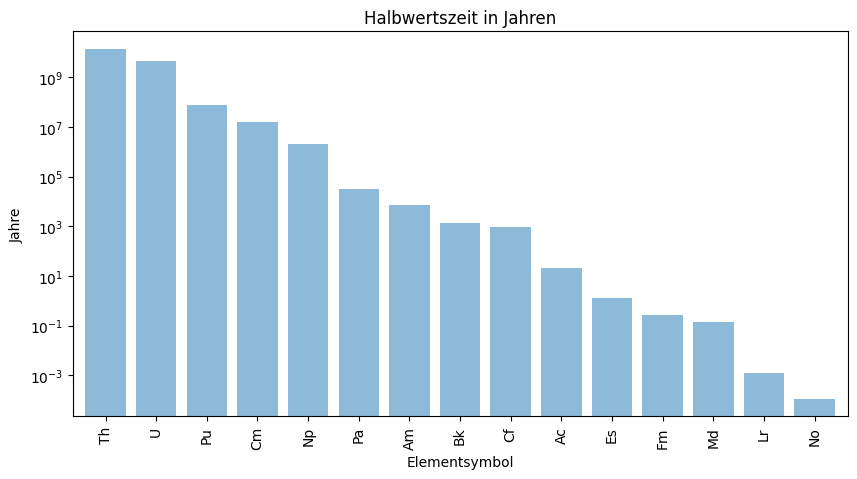

In [53]:
actinides_plot = actinides.sort_values(ascending=False)
actinides_plot.plot(kind='bar',
               title=actinides.name,
               ylabel='Jahre',
               logy=True,
               alpha=0.5,
               width=0.8,
               figsize=(10, 5))

### Aktienpreis
`stock_price` enthält den mit geometrischer brownscher Bewegung simulierten Preis einer Aktie seit 2019, in €.

In [54]:
stock_price = pd.read_csv(
    'data/stock_price.csv', index_col=0, parse_dates=True
).squeeze()
stock_price

Datum
2019-01-01 00:00:00    1.000069
2019-01-01 01:00:00    0.997037
2019-01-01 02:00:00    0.985275
2019-01-01 03:00:00    0.985195
2019-01-01 04:00:00    0.981277
                         ...   
2021-04-19 19:00:00    3.655785
2021-04-19 20:00:00    3.631784
2021-04-19 21:00:00    3.593652
2021-04-19 22:00:00    3.518358
2021-04-19 23:00:00    3.585394
Name: Stock price, Length: 20160, dtype: float64

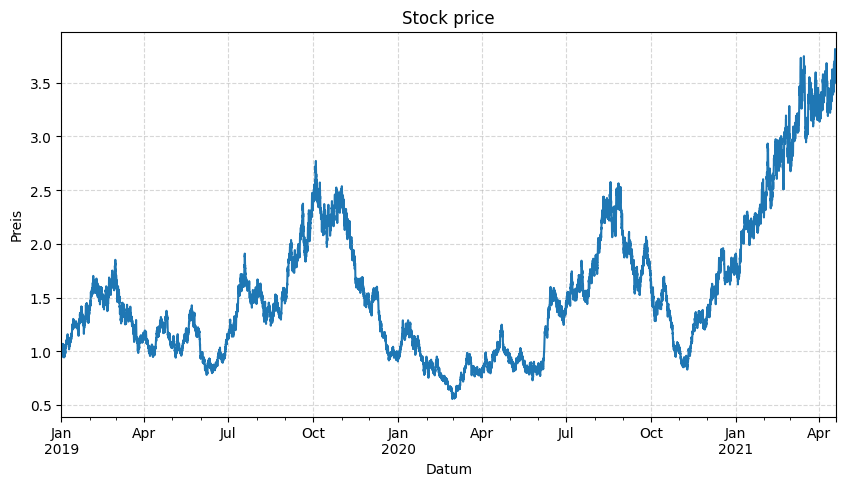

In [55]:
# Bitte geben Sie Ihren Code hier ein.
stock_price.plot(kind='line',
                 title=stock_price.name,
                 ylabel='Preis',
                 xlabel='Datum',
                 figsize=(10, 5)).grid(True, linestyle='--', alpha=0.5)

### Bundestagswahl 2021
`waehlerstimmen` enthält die absolute Zahl der auf verschiedene Parteien entfallenen Zweitstimmen bei der Bundestagswahl 2021.

In [56]:
waehlerstimmen = pd.read_csv('data/waehlerstimmen.csv', index_col=0).squeeze()
waehlerstimmen

Partei
CDU           8775471
SPD          11955434
AfD           4803902
FDP           5319952
DIE LINKE     2270906
GRÜNE         6852206
CSU           2402827
Sonstige      4061325
Name: Zweitstimmen BTW 2021, dtype: int64

<Axes: title={'center': 'Balkendiagramm'}, xlabel='Partei', ylabel='Stimmen'>

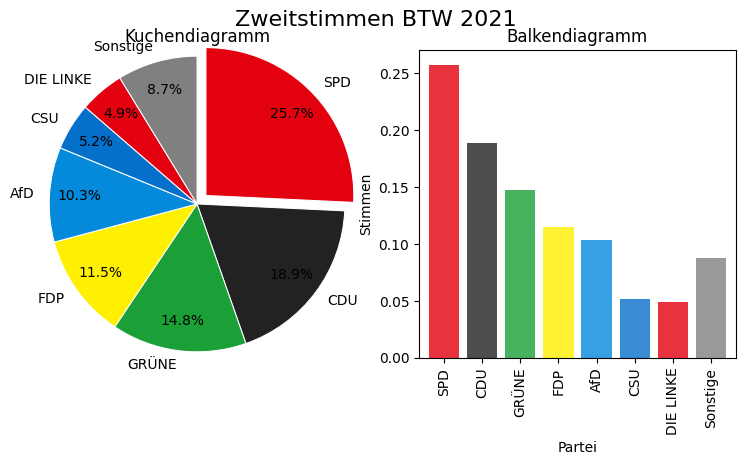

In [94]:
fig, (ax1, ax2) = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(20, 5))

fig.suptitle(waehlerstimmen.name, fontsize=16)


waehlerstimmen_plot = waehlerstimmen.sort_values(ascending=False)
waehlerstimmen_plot = waehlerstimmen_plot.drop('Sonstige')
waehlerstimmen_plot.loc['Sonstige'] = waehlerstimmen.loc['Sonstige']
waehlerstimmen_plot.plot(kind='pie',
                    ax=ax1,
                    title='Kuchendiagramm',
                    ylabel='',
                    figsize=(10, 5),
                    autopct='%1.1f%%',
                    counterclock=False,
                    startangle=90,
                    explode=[0.1, 0, 0, 0, 0, 0, 0, 0,],
                    pctdistance=0.8,
                    labeldistance=1.1,
                    radius=1.2,
                    colors= ['#E3000F','#222222','#1AA037','#FFEF00','#0489DB','#0570C9','#E3000F','grey'],
                    wedgeprops={'linewidth': 0.75, 'edgecolor': 'white'},
                    )
waehlerstimmen_plot[:] = waehlerstimmen_plot.values[:]/waehlerstimmen_plot.values.sum()
waehlerstimmen_plot.plot(kind='bar',
                    ax=ax2,
                    title='Balkendiagramm',
                    ylabel='Stimmen',
                    xlabel='Partei',
                    figsize=(9, 4),
                    alpha=0.8,
                    width=0.8,
                    color= ['#E3000F','#222222','#1AA037','#FFEF00','#0489DB','#0570C9','#E3000F','grey'],
                    )
